# TP2 Mean Shift

Read, understand, and complete and run the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

Return your work by e-mail using a single file (ipynb or zip) with the format 'introvis18_tp2_yourname.ipynb'


## 0. Imports

In [1]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

%matplotlib inline 
# to display directly in the notebook

import scipy.ndimage as ndimage
# one of several python libraries for image procession

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

from skimage.color import rgb2lab,lab2rgb
# for colorspace conversions

from scipy.spatial.distance import cdist

In [2]:
# code found on http://sametmax.com/saffranchir-des-doublons-dun-iterable-en-python/
def skip_duplicates(iterable, key=lambda x: x):
    fingerprints = set()
    for x in iterable:
        fingerprint = key(x)
        if fingerprint not in fingerprints:
            yield x
            fingerprints.add(fingerprint)

## 1. Mean shift

In this section, we will implement Mean Shift and test is on simple synthetic data (i.e. points you will sample from a probability distribution with known density - see below).

1: Generate a random vector of 100 2D points 'data1' with 50 points sampled from a Gaussian distribution of variance 1 centered in (0,0) and 50 points sampled from a Gaussian distribution of variance 1 centered in (2,1). Plot your points using the 'plt.scatter' function. This 'data' vector will be the synthetic data you will try to cluster, and for which the algorithm should manage to separate the point coming from each of the two Gaussians. Repeat to create a vector 'data2' with the center of the second Gaussian in (3,3). Which will be the easiest data vector to cluster? Test both in the following experiments.

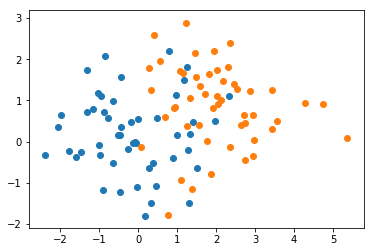

In [3]:
cov1=[[1,0],[0,1]]
cov2=[[1,0],[0,1]]

A=np.random.multivariate_normal([0,0], cov1,50)
B=np.random.multivariate_normal([2,1], cov2,50)

data1=np.concatenate((A,B)) #the 50 first points are from the first gaussian, the others from the second one

plt.scatter([i[0] for i in data1[:50]],[i[1] for i in data1[:50]])
plt.scatter([i[0] for i in data1[50:]],[i[1] for i in data1[50:]])

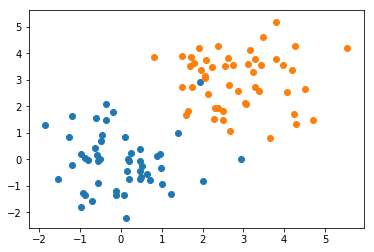

In [4]:
C=np.random.multivariate_normal([0,0], cov1,50)
D=np.random.multivariate_normal([3,3], cov2,50)

data2=np.concatenate((C,D)) #the 50 first points are from the first gaussian, the others from the second one

plt.scatter([i[0] for i in data2[:50]],[i[1] for i in data2[:50]])
plt.scatter([i[0] for i in data2[50:]],[i[1] for i in data2[50:]])

In [5]:
# The easiest set to cluster will be the second one : as the center of the gaussians are furhter 
# from each other in the second situation, the convex hull of their dots are more probable
# to be with a null intersection

2: We will segment images using a different distance parameter for space and color. For this reason, we will use a d dimensionnal vector 'sigma' as a parameter for all our mean-shift functions. It defines a scale for each dimension. What would be a meaningful parameter sigma for each of the synthetic data sets (data1 and data2)?

In [6]:
# Sigma can be interpreted as the radius of the ball centered on a point of given coordinate, 
# ball in which the mean will be calculated.
# Thereby, the higher sigma is, the less cluster we'll have.

3: Implement the function MS_step which takes as input a vector of all the data point 'data', a starting point 'x' and the standard deviations 'sigma' and returns the updated position of the point 'x' after one step of the mean-shift algorithm. Test it on your synthetic data and visualize the result.

Be cautious: the formula given in the lecture (slide 94) is only valid in the isotropic case (why?). In the anisotropic case, you can either redo the derivation, or simply scale the components to come back to the isotropic case.

In [7]:
def distance(x,y,sigma):
    return np.linalg.norm((x-y)/sigma)

def kernel(x,y,sigma):
    return np.exp(-0.5*distance(x,y,sigma))

def MS_step(data,x,sigma):
    C = cdist(x,data)
    C = np.exp(-1/2*(cdist(x/sigma,data/sigma)))
    Ones = np.ones(data.shape[0])
    sumD = np.dot(C,Ones)
    sumN = np.dot(C,data)
    
    return np.array([sumN[i]/sumD[i] for i in range(data.shape[0])])

4: Implement the function MS_point which iterates MS_step until convergence (e.g. the estimate changes by less than 0.01). Test it on your synthetic data and visualize the results.

In [8]:
def MS_point(data,x,sigma):
    eps=1
    xc=x
    while eps > 0.001:
        xn=MS_step(data,xc,sigma)
        eps=distance(xn,xc,sigma)
        xc=xn
    return xc

5: Implement the MS function, which implements the full mean shift algorithm by iterating MS_point on all the points, and merging modes which distance normalized by sigma -- sqrt[sum[((x-y)/sigma)**2) ]] -- is smaller than 0.5 . It must return a list of the modes and a label (corresponding to a mode) for each point.

5 clusters
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


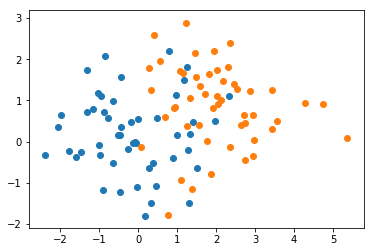

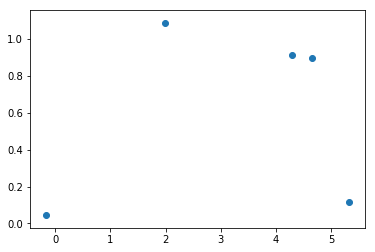

In [9]:
def MS(data,sigma):

    labelz=np.zeros([data.shape[0],1])
    modez=np.zeros([0,data.shape[1]])
    labels=[i for i in range(data.shape[0])]
    modes=[]
    
    # evaluate the modes
    xc=MS_point(data,data,sigma)
        
    
    # merge the points and create the labels and modes
    for i in range(len(xc)):
        for j in range(i,len(xc)):
            if distance(xc[i],xc[j],sigma)<0.5:
                labels[j]=labels[i]
                xc[j]=xc[i]
    
    
    
    labelo=list(skip_duplicates(labels))
    for i in labelo:
        modes.append(xc[labels.index(i)])
    
    modez=np.array(modes)
    
    compteur=0
    for i in labelo:
        for j in range(len(labels)):
            if labels[j]==i:
                labels[j]=compteur
        compteur+=1
    
    for i in range(len(labels)):
        labelz[i]=labels[i]
    
    return labelz,modes

labels,modes=MS(data1,[0.1,0.2])
print(len(modes),"clusters")
print(labels)
plt.scatter([i[0] for i in data1[:50]],[i[1] for i in data1[:50]])
plt.scatter([i[0] for i in data1[50:]],[i[1] for i in data1[50:]])
plt.show()
plt.scatter([modes[i][0] for i in range (len(modes))],[modes[i][1] for i in range (len(modes))] )

## 2. Segmentation

1: Download [this small image](http://imagine.enpc.fr/~aubrym/lectures/introvis17/legumes_small.jpg), load it and convert it to the Lab colorspace. Why is it necessary to change colorspace? What are the range of the colorvalues in Lab? 

In [10]:
rgb = plt.imread('legumes_small.jpg')
lab = rgb2lab(rgb)

# Lab colorspace because is more representative of the reality. It is also easier to cluster in Lab Colorspace.

# L (luminosity) is in [0,100]
# a is in [-35,50]
# b is in [-23,52]

2: In Mean Shift segmentation, all pixels in the image will be treated as data points including both their color and position in the image. Convert the (N,M,3) image into an (NM,5) array incuding color and position information for each point. What would be a meaningful value for sigma?

Tip: use the np.meshgrid function

In [11]:
arr = np.zeros((lab.shape[0],lab.shape[1],5))

def nm3_to_nm5(I):
    (n,m,_) = I.shape
    res = np.zeros((n*m,5))
    for i in range(n):
        for j in range(m):
            res[i*m+j] = [i,j,I[i,j][0],I[i,j][1],I[i,j][2]]
    return res

# A meaningful value for sigma will 
# be with sigma_x = sigma_y and with a value of sigma_i depending on the variance of i with i in [L,a,b]

3: Use the MS function from the previous section to compute a meaningful segmentation of the image. Visualize the results as an image by replacing the color values of the pixels associated to each mode by the color of the mode.

In [12]:
img=nm3_to_nm5(lab)

sigma = [0.5,0.5,15,15,15]

labels, modes = MS(img,sigma)

print(len(modes),"clusters")

#print(modes)

165 clusters


165 clusters


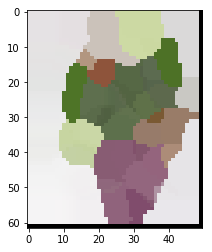

In [13]:
(n,m,_)=lab.shape
img2 = np.zeros((n,m,3))
print(len(modes), "clusters")
for i in range(n-1):
    for j in range(m-1):
        indice = int(labels[i*m+j])
        val = modes[indice][2:]
        img2[i,j] = val

img2 = lab2rgb(img2)
plt.imshow(img2)
plt.show()
plt.imsave("legume_small_MS.png",img2)